In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import re
from astropy.io import fits
from astropy.wcs import WCS


['Year_3', '.Spotlight-V100', '.DS_Store', 'images', 'calibration', 'W UMa', 'TZ_Aur', 'calibrated_images', '.Trashes', 'Variable Star', 'V403 Gem', '.fseventsd', '.git']
['Chr R', 'Chr G', 'CHr I']
38963.10313180551
39188.132325294624
25066.499098423286


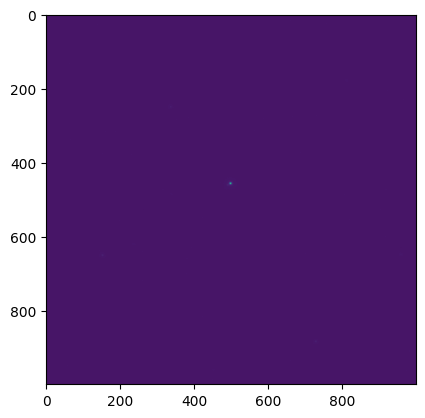

In [30]:
cal_path = '/Volumes/external_2T/calibration/2023-10/neg10c/master/'
data_path = '/Volumes/external_2T/'

flat_dark = fits.open(cal_path + 'dark_flat_gr_3s_master.fits')[0].data #Flat dark same for all images

exposure = '10s'      #Define the exposure of the images to calibrate
star_name = 'W UMa'      # Define star name

flat_i = fits.open(cal_path + 'flat_i_master.fits')[0].data
flat_g = fits.open(cal_path + 'flat_g_master.fits')[0].data
flat_r = fits.open(cal_path + 'flat_r_master.fits')[0].data

stars = os.listdir(data_path)
print(stars)
for star in stars:
    if re.search(star_name, star):

        col_band = os.listdir(data_path + star)
        
        col_band = col_band[1:]
            
        print(col_band)
        for band in col_band:
            
            if band.endswith('I'):
                flat = flat_i
            elif band.endswith('G'):
                flat = flat_g
            elif band.endswith('R'):
                flat = flat_r

            avg_flat_dark = np.mean((flat-flat_dark))
            print(avg_flat_dark)
            files = os.listdir(data_path + star + '/' + band)
            for file in files:

                if re.search(exposure ,file):
                    dark = fits.open(cal_path + 'dark_' + exposure + '_master.fits')[0].data

                if file.endswith('.fits'):
                    science = fits.open(data_path + star + '/' + band + '/' + file)[0].data
                    header = fits.open(data_path + star + '/' + band + '/' + file)[0].header
                    cali_img = (science - dark) * (avg_flat_dark/(flat - flat_dark))
                    plt.imshow(cali_img)

                    hdu = fits.PrimaryHDU(cali_img)
                    hdu.header.update(header)
                    hdu.writeto(data_path + 'calibrated_images/' + star + '/' + band + '/' + '_calibrated_' + file, overwrite = True)
